In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import zipfile
import datetime
import numpy as np 

In [2]:
string = datetime.datetime.today().strftime('%y%m%d') #fecha de base de datos
#string='210513'
path2 = 'C:/Users/Emilio EG/Documents/ITAM/CIC19/Reportes/'+string+'/'

hoy=datetime.datetime.today()
#hoy= hoy - datetime.timedelta(days=1)
corte = hoy - datetime.timedelta(days=12) #hoy-12dias

#La base ya debe estar descargada

zf = zipfile.ZipFile(path2+string+'COVID19MEXICO.zip') 
base_covid = pd.read_csv(zf.open(string+'COVID19MEXICO.csv'),encoding='latin1') 
#base_covid = pd.read_csv(zf.open('COVID19MEXICO.csv'),encoding='latin1')
base_covid

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2021-07-01,z482b8,1,12,9,2,9,9,12,1,...,2,2,97,2,97,1,99,MÃ©xico,97,97
1,2021-07-01,z49a69,1,12,23,1,23,23,4,2,...,1,2,97,2,97,2,99,MÃ©xico,97,1
2,2021-07-01,z23d9d,1,12,22,2,24,22,9,1,...,2,2,97,2,97,6,99,MÃ©xico,97,97
3,2021-07-01,z24953,1,12,9,1,9,9,10,1,...,1,1,2,2,97,7,99,MÃ©xico,97,97
4,2021-07-01,zz8e77,1,12,9,2,9,9,2,1,...,2,2,97,2,97,6,99,MÃ©xico,97,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7530183,2021-07-01,5829be,1,4,4,1,4,4,2,1,...,2,2,97,2,97,6,99,MÃ©xico,97,97
7530184,2021-07-01,4ce570,1,12,9,1,9,9,13,1,...,2,2,97,1,2,7,99,MÃ©xico,97,97
7530185,2021-07-01,c9aae5,2,4,19,1,19,19,39,1,...,2,2,97,1,1,3,99,MÃ©xico,97,97
7530186,2021-07-01,8995a4,2,12,9,2,9,9,6,1,...,2,2,97,1,2,7,99,MÃ©xico,97,97


In [3]:
base_covid=base_covid[base_covid['CLASIFICACION_FINAL'].isin([1,2,3])] #positivo covid
base_cdmx=base_covid[base_covid['ENTIDAD_RES']==9] #de la CDMX
base_cdmx=base_cdmx[base_cdmx['MUNICIPIO_RES']!=999] #con alcaldia identificada
base_cdmx

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2021-07-01,z482b8,1,12,9,2,9,9,12,1,...,2,2,97,2,97,1,99,MÃ©xico,97,97
15,2021-07-01,z2770b,1,12,9,1,9,9,6,1,...,1,1,1,2,97,3,99,MÃ©xico,97,97
20,2021-07-01,zz9079,1,12,9,1,9,9,7,1,...,1,2,97,2,97,1,99,MÃ©xico,97,97
37,2021-07-01,z23c2e,1,12,9,1,9,9,5,1,...,2,2,97,2,97,1,99,MÃ©xico,97,97
55,2021-07-01,z3d1e2,2,12,9,1,9,9,5,1,...,1,1,1,2,97,3,99,MÃ©xico,97,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7530081,2021-07-01,c9ca44,2,4,9,1,9,9,8,1,...,2,2,97,1,1,3,99,MÃ©xico,97,97
7530094,2021-07-01,c48769,2,4,9,2,9,9,7,1,...,2,2,97,1,1,3,99,MÃ©xico,97,97
7530097,2021-07-01,63d61d,2,4,9,1,9,9,16,2,...,2,1,3,1,1,3,99,MÃ©xico,97,2
7530098,2021-07-01,9087fe,1,4,9,2,9,9,3,2,...,2,2,97,1,1,3,99,MÃ©xico,97,2


In [4]:
base_cdmx.loc[base_cdmx['FECHA_DEF'] == '9999-99-99', 'FECHA_DEF'] = pd.NaT #9999-99-99 pasa a ser NaT
base_cdmx['FECHA_DEF']=pd.to_datetime(base_cdmx['FECHA_DEF']) #los valores de la columna pasan a ser datetime
base_cdmx['FECHA_SINTOMAS']=pd.to_datetime(base_cdmx['FECHA_SINTOMAS']) #los valores de la columna pasan a ser datetime

base_def=base_cdmx.dropna() #eliminamos los NA, NaN y NaT
base_def

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
26917,2021-07-01,0b3101,1,4,9,2,9,9,15,2,...,99,1,1,2,97,3,99,MÃ©xico,97,1
28338,2021-07-01,110f91,1,4,9,2,9,9,7,2,...,99,1,1,2,97,3,99,MÃ©xico,97,2
28928,2021-07-01,072ac8,1,4,9,1,9,9,6,2,...,99,1,1,2,97,3,99,MÃ©xico,97,2
29175,2021-07-01,0f2f41,1,4,9,1,11,9,15,2,...,99,1,1,2,97,3,99,MÃ©xico,97,2
29252,2021-07-01,063132,1,4,9,2,9,9,15,2,...,99,1,1,2,97,3,99,MÃ©xico,97,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7490323,2021-07-01,e423be,2,9,9,2,20,9,10,2,...,99,2,97,2,97,2,99,MÃ©xico,97,2
7499650,2021-07-01,7ff97a,1,6,9,1,9,9,17,2,...,2,2,97,2,97,1,99,MÃ©xico,97,2
7502419,2021-07-01,adc380,1,6,9,2,22,9,11,2,...,2,2,97,2,97,1,99,MÃ©xico,97,2
7503294,2021-07-01,bd4d52,1,6,9,1,9,9,7,2,...,2,2,97,2,97,1,99,MÃ©xico,97,2


In [5]:
delegacion=pd.read_excel('Delegaciones.xlsx')
delegacion

,CLAVE_MUNICIPIO,MUNICIPIO,POBLACION
0,2,AZCAPOTZALCO,400161
1,3,COYOACÁN,608479
2,4,CUAJIMALPA DE MORELOS,199224
3,5,GUSTAVO A. MADERO,1164477
4,6,IZTACALCO,390348
5,7,IZTAPALAPA,1827868
6,8,LA MAGDALENA CONTRERAS,243886
7,9,MILPA ALTA,137927
8,10,ÁLVARO OBREGÓN,749982
9,11,TLÁHUAC,361593


In [6]:
defs={}
defs_tot={}
defs_avg={}

for i in range(0,16):
    defs[i]=base_def[base_def['MUNICIPIO_RES']==i+2].pivot_table(index=['FECHA_DEF'], aggfunc='size') #Contar muertes por dia en cada municipio
    defs[i]=pd.DataFrame(defs[i]) #lo anterior a dataframe
    idx=pd.date_range(defs[i].index[0],hoy) #creamos un indice de fechas desde el primer registro hasta hoy
    defs[i]=defs[i].reindex(idx, fill_value=0) #reindexamos el df para no saltarnos fechas
    defs_tot[i]=defs[i].cumsum()*(100000/delegacion['POBLACION'][i]) #el acumulado dia a dia por 100 mil habs
    defs_avg[i]=defs[i].rolling(window=7).mean()*(100000/delegacion['POBLACION'][i]) #defunciones diarias por 100 mil habs (promedio movil)

In [7]:
con={}
con_tot={}
con_avg={}

for i in range(0,16):
    con[i]=base_cdmx[base_cdmx['MUNICIPIO_RES']==i+2].pivot_table(index=['FECHA_SINTOMAS'], aggfunc='size') #contar casos nuevos por dia
    con[i]=pd.DataFrame(con[i]) #lo anterior como dataframe
    idx=pd.date_range(con[i].index[0],hoy) #creamos un indice de fechas desde el primer registro hasta hoy
    con[i]=con[i].reindex(idx, fill_value=0) #reindexamos el df para no saltarnos fechas
    con_tot[i]=con[i].cumsum()*(100000/delegacion['POBLACION'][i]) #el acumulado dia a dia por 100 mil habs
    con_avg[i]=con[i].rolling(window=7).mean()*(100000/delegacion['POBLACION'][i]) #promedio movil de casos diarios por 100 mil habs

In [8]:
def_dia=[] #cada valor de la serie corresponde a una delegacion, todas las delegaciones en la misma fecha
def_cum=[]
caso_dia=[]
caso_cum=[]

for i in range(len(delegacion)):
    def_dia.append(defs_avg[i].iloc[-13,-1]) #en la serie de defunciones diarias agregamos el valor hace 12 dias
    def_cum.append(defs_tot[i].iloc[-1,-1]) #en la serie de defunciones acumuladas agregamos el ultimo valor
    caso_dia.append(con_avg[i].iloc[-13,-1]) #en la serie de casos diarios agregamos el valor de hace 12 dias
    caso_cum.append(con_tot[i].iloc[-1,-1]) #en la serie de casos acumulados agregamos el ultimo valor

In [9]:
delegacion['DEF_DIA']=def_dia
delegacion['DEF_CUM']=def_cum
delegacion['CASO_DIA']=caso_dia
delegacion['CASO_CUM']=caso_cum
    

In [10]:
import geopandas as gpd

In [11]:
shapefile = 'alcaldias.shp' #direccion del shp
gdf = gpd.read_file(shapefile)[['municipio','geometry']] #leemos el shp, solo las columnas municipio y geometry
#gdf

In [12]:
gdf['CLAVE_MUNICIPIO']=pd.DataFrame([9,14,5,2,6,10,13,17,12,4,15,7,3,16,8,11]) #creamos las claves de los municipios, sin esto no se puede juntar el geodataframe y el df
gdf

,municipio,geometry,CLAVE_MUNICIPIO
0,9,"POLYGON ((-98.99723 19.22731, -98.99745 19.227...",9
1,14,"POLYGON ((-99.13679 19.40156, -99.13682 19.401...",14
2,5,"POLYGON ((-99.11860 19.58446, -99.11691 19.581...",5
3,2,"POLYGON ((-99.18231 19.50748, -99.18229 19.507...",2
4,6,"POLYGON ((-99.05584 19.42196, -99.05589 19.421...",6
5,10,"POLYGON ((-99.18871 19.39475, -99.18868 19.394...",10
6,13,"POLYGON ((-99.09870 19.31964, -99.09849 19.319...",13
7,17,"POLYGON ((-99.10895 19.45273, -99.10889 19.452...",17
8,12,"POLYGON ((-99.19629 19.30228, -99.19595 19.302...",12
9,4,"POLYGON ((-99.25698 19.40043, -99.25694 19.400...",4


In [13]:
gdf = gdf.merge(delegacion, left_on = 'CLAVE_MUNICIPIO', right_on = 'CLAVE_MUNICIPIO', how = 'left') #juntamos geodataframe y df
#gdf

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


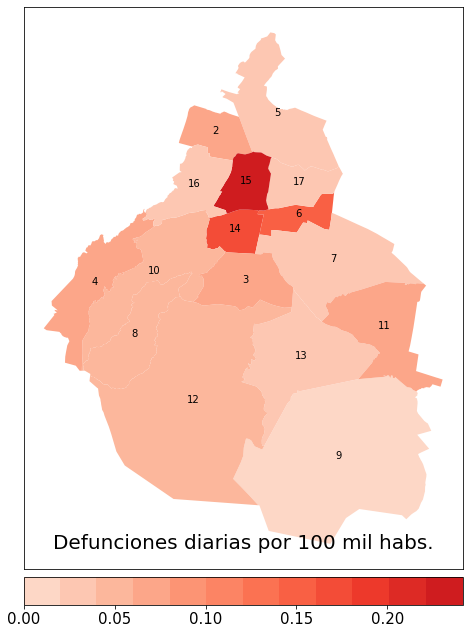

<Figure size 432x288 with 0 Axes>

In [14]:
from mpl_toolkits.axes_grid1 import make_axes_locatable 
# import mapclassify 

fig, ax = plt.subplots(figsize = (15,11))
divider = make_axes_locatable(ax)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

import matplotlib as mpl

cmap = x
cmap = mpl.colors.ListedColormap(cmap[3:15,:-1])

# Defunciones diarias 

cax = divider.append_axes('bottom', size = '5%', pad = 0.1)
cax.tick_params(labelsize=15)

gdf.apply(lambda x: ax.annotate(s=x.CLAVE_MUNICIPIO, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)

gdf.plot(column = 'DEF_DIA', ax = ax, cax = cax, cmap = cmap, legend = True, legend_kwds={'orientation':'horizontal'})
plt.title('Defunciones diarias por 100 mil habs.\n',fontsize=20)
plt.savefig(path2 + 'cdmx-def-diarias.png', bbox_inches='tight')
plt.show()
plt.clf()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


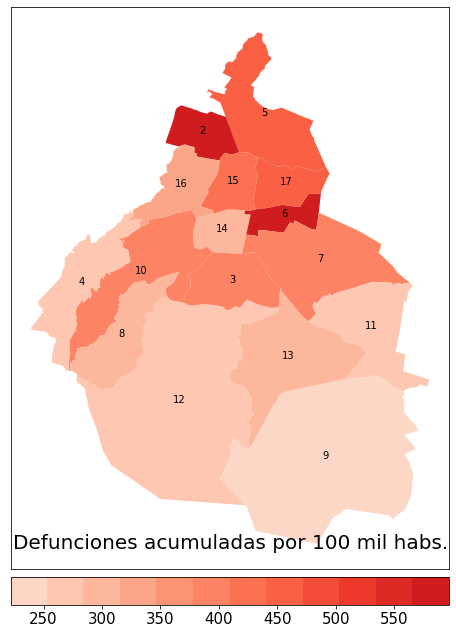

<Figure size 432x288 with 0 Axes>

In [15]:
fig, ax = plt.subplots(figsize = (15,11))
divider = make_axes_locatable(ax)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

#import matplotlib as mpl

#cmap = mpl.cm.Reds(np.linspace(0,1,20))
#cmap = mpl.colors.ListedColormap(cmap[5:,:-1])

# Defunciones diarias 

cax = divider.append_axes('bottom', size = '5%', pad = 0.1)
cax.tick_params(labelsize=15)

gdf.apply(lambda x: ax.annotate(s=x.CLAVE_MUNICIPIO, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)

gdf.plot(column = 'DEF_CUM', ax = ax, cax = cax, cmap = cmap, legend = True, legend_kwds={'orientation':'horizontal'})
plt.title('Defunciones acumuladas por 100 mil habs.\n',fontsize=20)
plt.savefig(path2 + 'cdmx-def-acum.png', bbox_inches='tight')
plt.show()
plt.clf()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


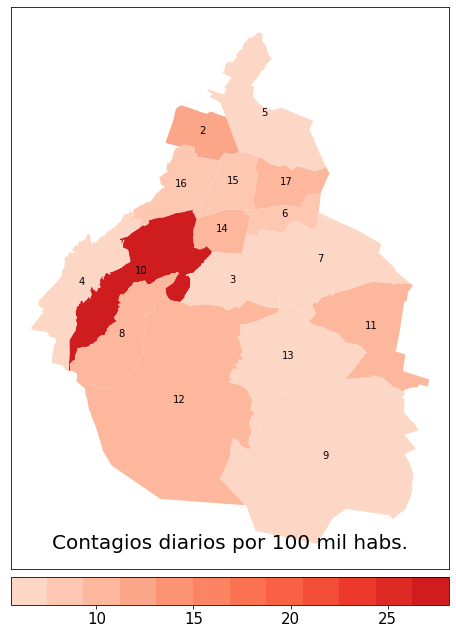

<Figure size 432x288 with 0 Axes>

In [16]:
fig, ax = plt.subplots(figsize = (15,11))
divider = make_axes_locatable(ax)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

#import matplotlib as mpl
#
#cmap = mpl.cm.Reds(np.linspace(0,1,20))
#cmap = mpl.colors.ListedColormap(cmap[5:,:-1])

# Defunciones diarias 

cax = divider.append_axes('bottom', size = '5%', pad = 0.1)
cax.tick_params(labelsize=15)

gdf.apply(lambda x: ax.annotate(s=x.CLAVE_MUNICIPIO, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)

gdf.plot(column = 'CASO_DIA', ax = ax, cax = cax, cmap = cmap, legend = True, legend_kwds={'orientation':'horizontal'})
plt.title('Contagios diarios por 100 mil habs.\n',fontsize=20)
plt.savefig(path2 + 'cdmx-casos-dia.png', bbox_inches='tight')
plt.show()
plt.clf()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


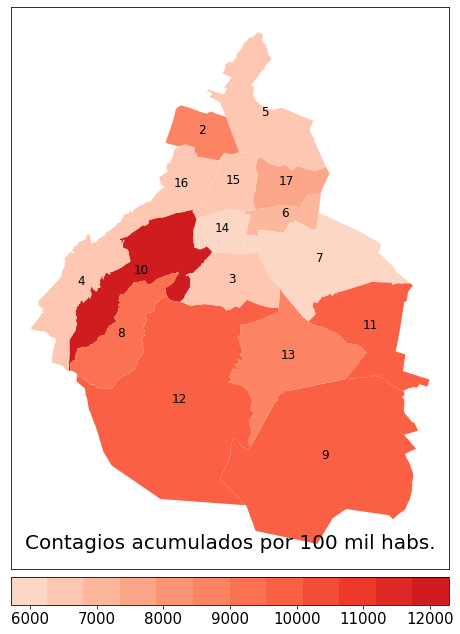

<Figure size 432x288 with 0 Axes>

In [17]:
fig, ax = plt.subplots(figsize = (15,11))
divider = make_axes_locatable(ax)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

#import matplotlib as mpl
#
#cmap = mpl.cm.Reds(np.linspace(0,1,20))
#cmap = mpl.colors.ListedColormap(cmap[5:,:-1])

# Defunciones diarias 

cax = divider.append_axes('bottom', size = '5%', pad = 0.1)
cax.tick_params(labelsize=15)

gdf.apply(lambda x: ax.annotate(s=x.CLAVE_MUNICIPIO, xy=x.geometry.centroid.coords[0], ha='center', fontsize=12),axis=1)

gdf.plot(column = 'CASO_CUM', ax = ax, cax = cax, cmap = cmap, legend = True, legend_kwds={'orientation':'horizontal'})
plt.title('Contagios acumulados por 100 mil habs.\n',fontsize=20)
plt.savefig(path2+'cdmx-casos-acum.png', bbox_inches='tight')
plt.show()
plt.clf()